## The Business Problem

Leaders at Big Mountain Resort wanted to increase profits from their current level in this ski season by right-sizing ticket prices given their operating costs.

Increased operating costs from an additional ski lift have triggered questions about the company’s reliance on average prices in its market segment. The company may not be maximizing profits for the resources they own. If the company can increase revenue for this fiscal year despite increased operating costs, the new pricing strategy distilled from the data findings will be a success.

With the increased capacity for more customers, the number of customers needs to be matched with the optimum ticket price. How long the resort can stay open, responsibly have maximum customer levels, and optimize their ticket prices are the areas of focus.

If ticket prices are too high, customers will stay away.
If lift lines are too long, customers won’t return and the reputation of the resort will be damaged.

The direct contacts for this data science project were Jimmy Blackburn, Director of Operations, and 
Alesha Eisen, Database Manager. The analysis team pulled the data from a CSV file supplied by the Database Manager; this file contained 27 attributes of 330 ski resorts in the United States.

After cleaning the data, organizing by region and state, checking for duplicates and missing values, the dataset was prepared for premodeling. 






## Initial Data Assessment

The analysis of the raw data yielded 330 rows and 27 columns, and after sifting through several rows and columns with nearly empty cells, the rows and columns stand at 277, 25 currently. Regions larger than state were included in the original data No duplicate resorts were found, although some resorts had the same name as others. Categories such as whether or not a resort had a fast eight-person lift or had night skiing often contained null values. The fast eight column was dropped and the others were kept for now. 

Ticket prices came in two varieties for this dataset: weekend and weekday prices for adults. In several states in the eastern US, such as Virginia, and those resorts charging less than $100/ticket, these two prices differed greatly. For the western states, and especially for Montana, these prices were the same and the decision was made to have one ticket price column (AdultWeekend).

Outliers in years of service and skiable area were fixed, and the quality of the data was thoroughly assessed. 

Population data (from Wikipedia) was added for each state, trimmed to fit the ski_data file. Currently, state_summary.csv and ski_data_cleaned.csv are housed as separate files in the .../data directory.

Further data exploration is now the next step. There are still null values in some columns (upwards of 16% and 20% of the data in those columns). Whether those columns are still reliable and useful should be assessed in the Exploratory Data Analysis stage.

Ticket price, expressed as a single column, does fluctuate amongst resorts. It will be important to infer what factors correlate with the variance in price.

In Figure 1 is the listing of categories for Big Mountain Resort itself:

### Figure 1
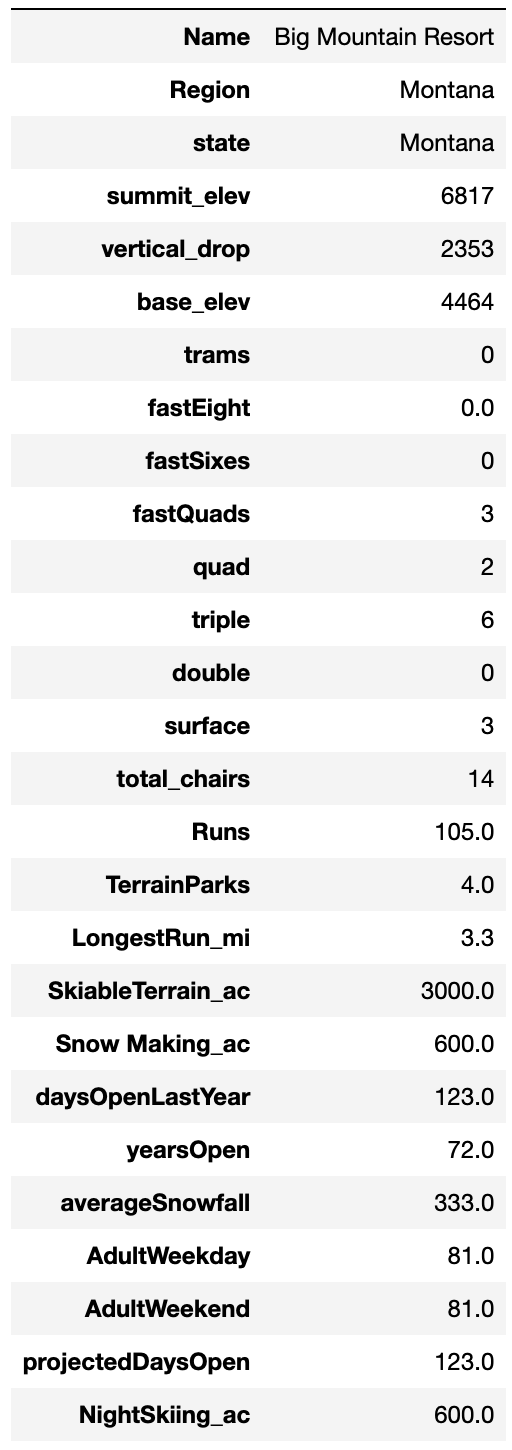



In Figure 2, the number of ski resorts per state are given.

### Figure 2
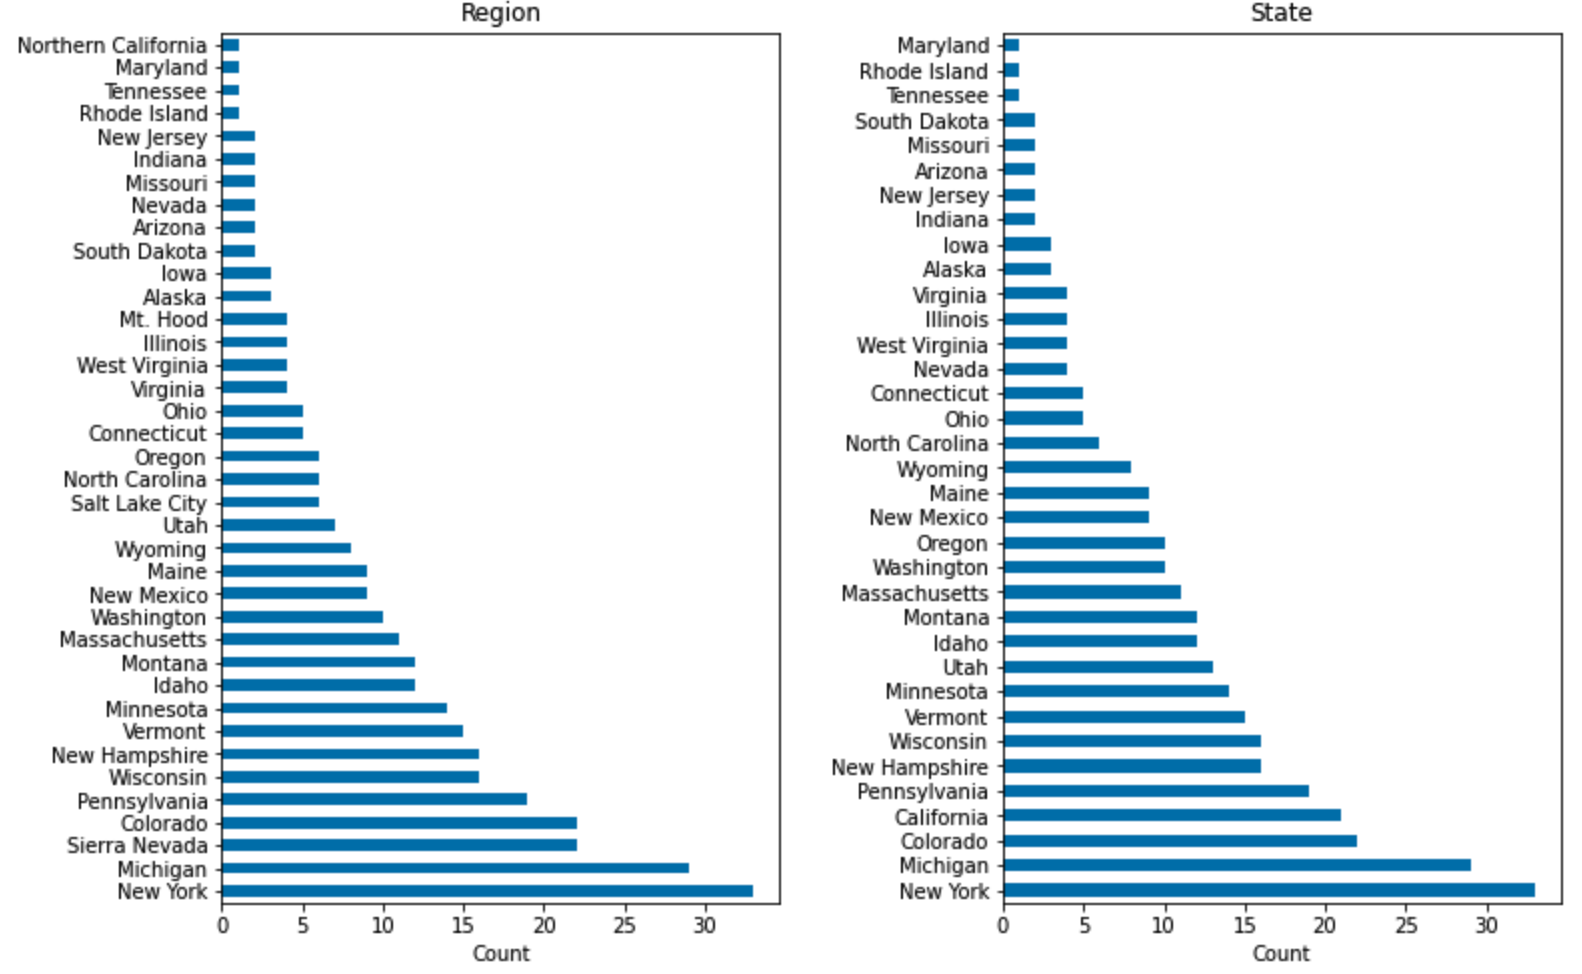

In Figure 3, the average ticket price by state is provided.

### Figure 3

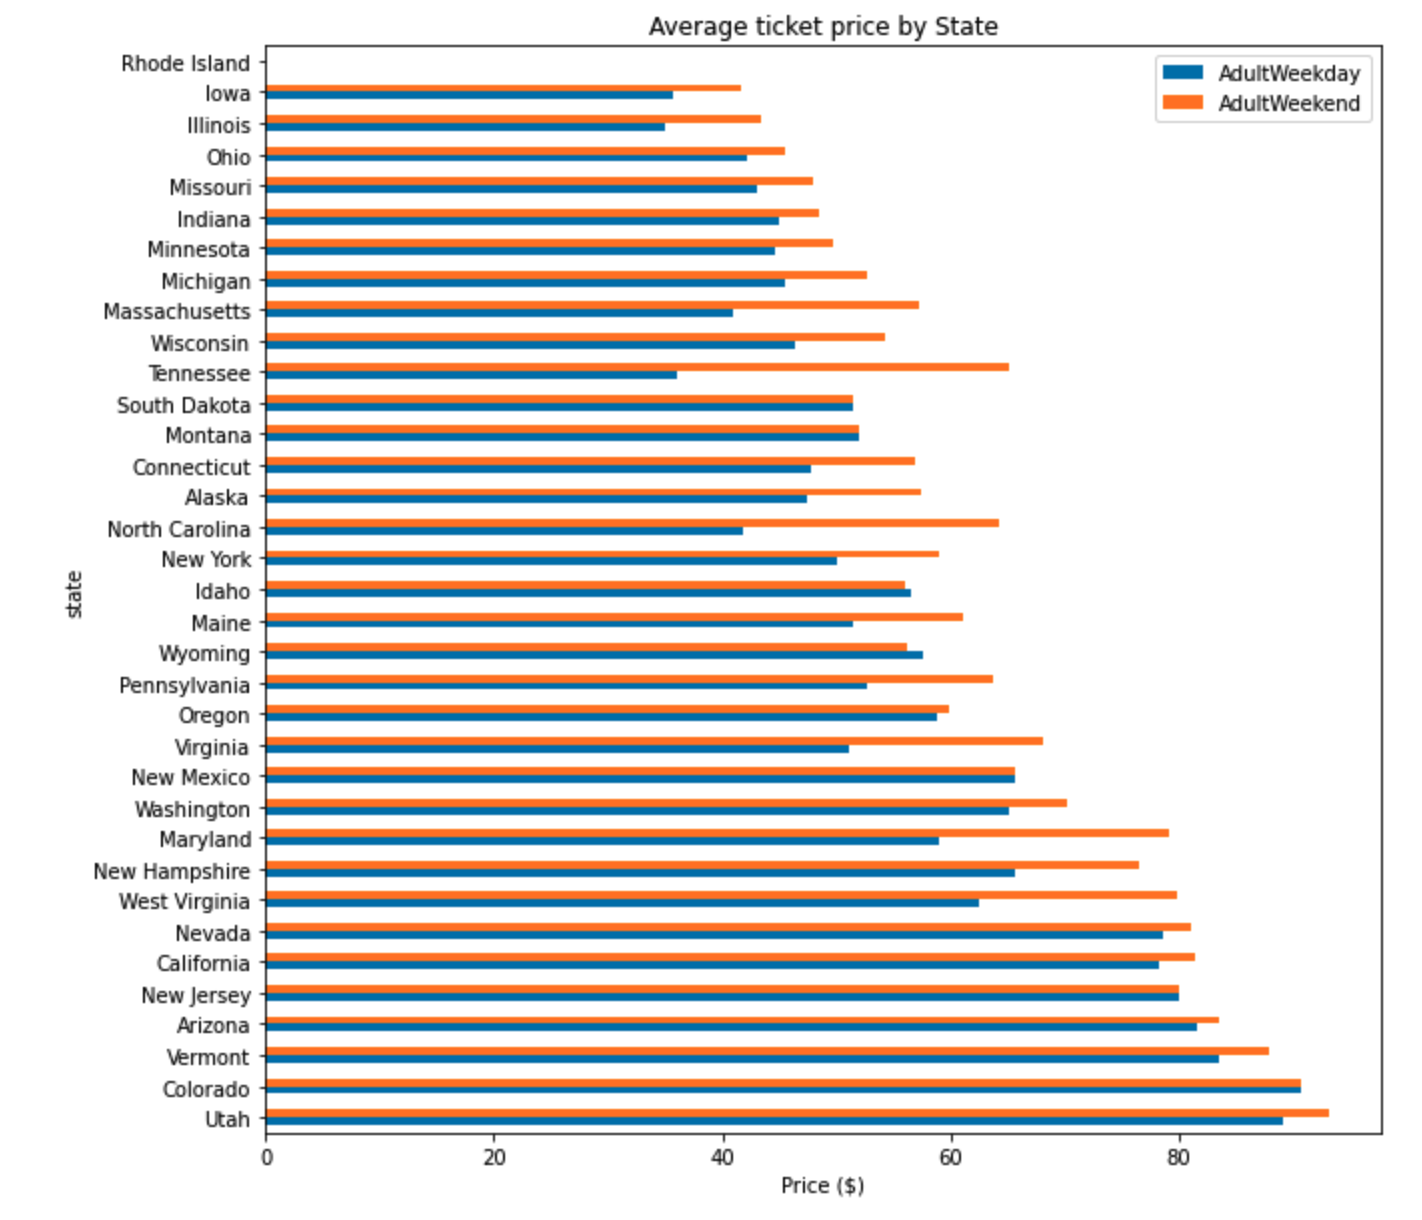

As can be seen in Figure 4, there are some large fluctuations for ticket prices depending on whether or not the prices are for Weekend or Weeday tickets.

### Figure 4
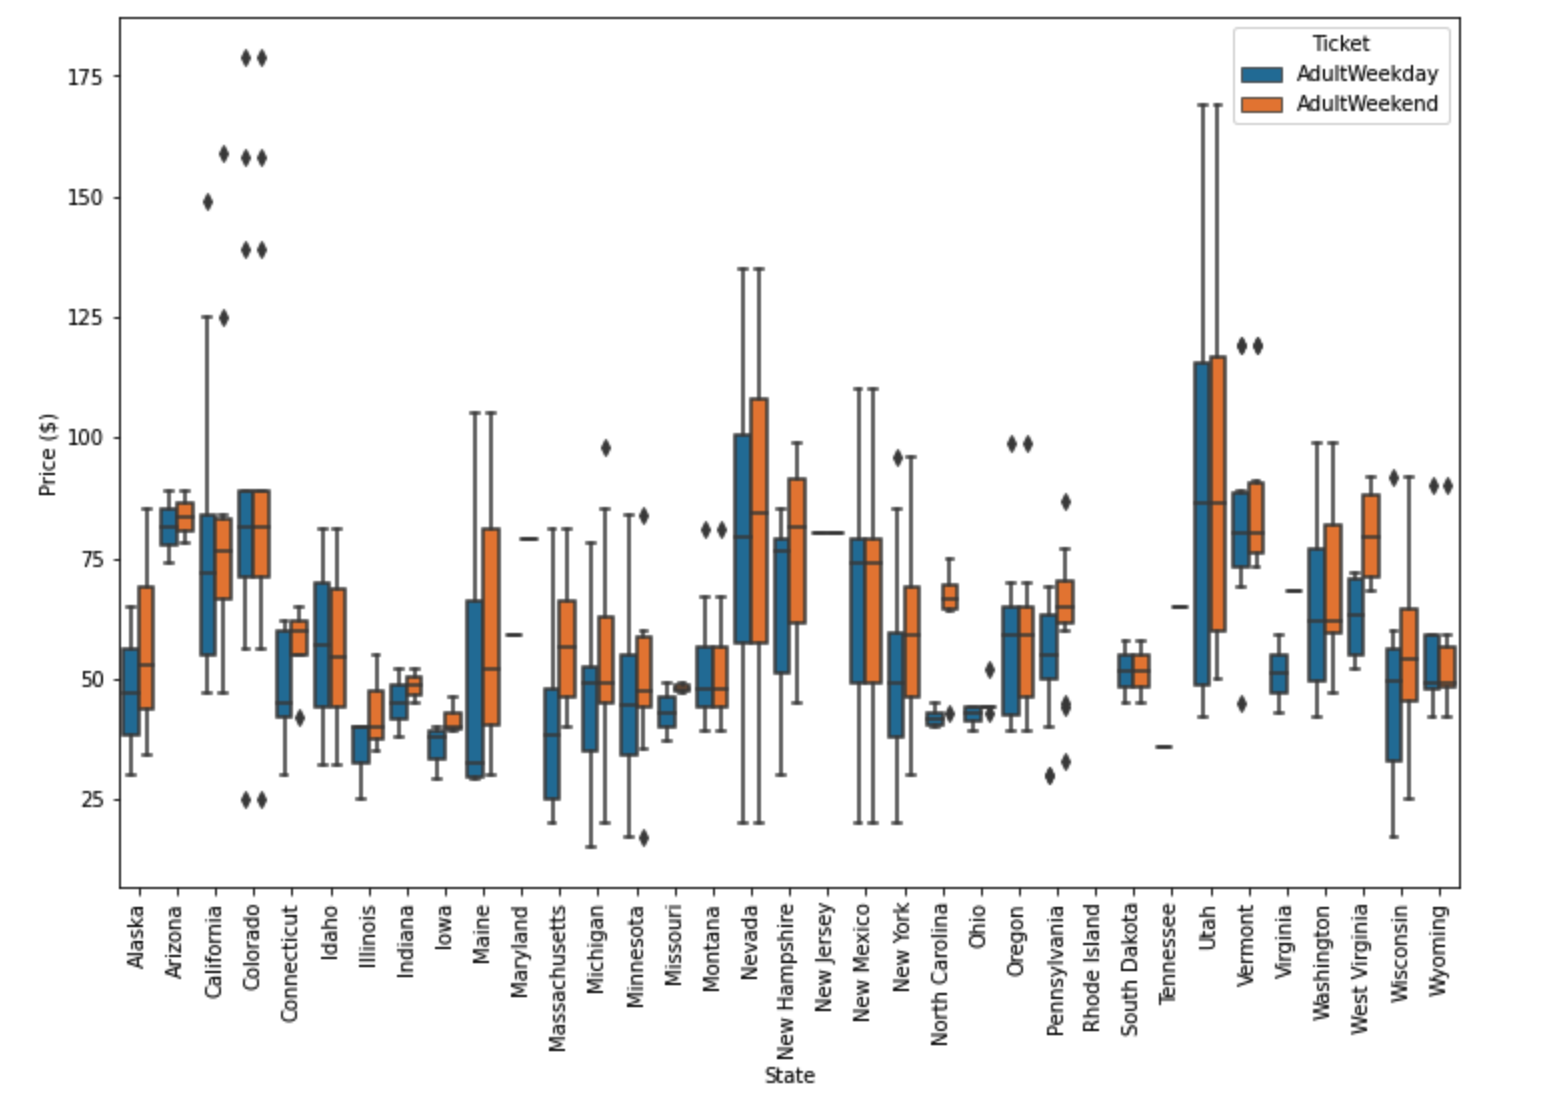

Most of the fluctuations appear in states of the Eastern US.

### Exploratory Data Analysis

Numerical data included total state area, total state population, resorts per state, total skiable area, total night skiing area, and total days open. Density and ratios were taken from these numerical categories. 

Considering the number of factors and the possible interactions, a Principal Component Analysis (PCA) was conducted to assess what factors (or combination thereof) accounted for the most variance. All data were zero scaled before the PCA. The first two principal components accounted for the majority (75%) of the variance, specifically the number of resorts per state and the total skiable area in the state. 

Nothing definitive arose for states per se, but as there are differences between East Coast states vs. West Coast states, comparisons to more regionally approximate states might be best. Considering the big impact states such as New Hampshire and Vermont have on some of the statistics, it might be wise to only assess ski resorts closer to Montana that are more likely competition for our customers. Overall for the current analysis, the states do not have large groupings and thus there is some justification for treating states equally for pricing models.

For subsequent modeling, the analysis should take into account the resorts_per_100ksq_mile and resorts_per_100kcapita. Additionally, the numbers of fastQuads correlate with ticket prices, as do the number of  Runs and the quantity of snow making equipment.

Some features, such as fast quads, have caveats such as most resorts don’t have any, but those that do have some have higher ticket prices. There may be different markets in terms of how many customers 

Target feature: The AdultWeekend ticket prices remain the target and do show.



In Figure 5, the results from a principle component analysis provides a spread of the two most important components, noting the state information, price, and quartiles for price. Some states, such as New Hampshire and Vermont, are outliers in terms of the density of their ski resorts.

### Figure 5
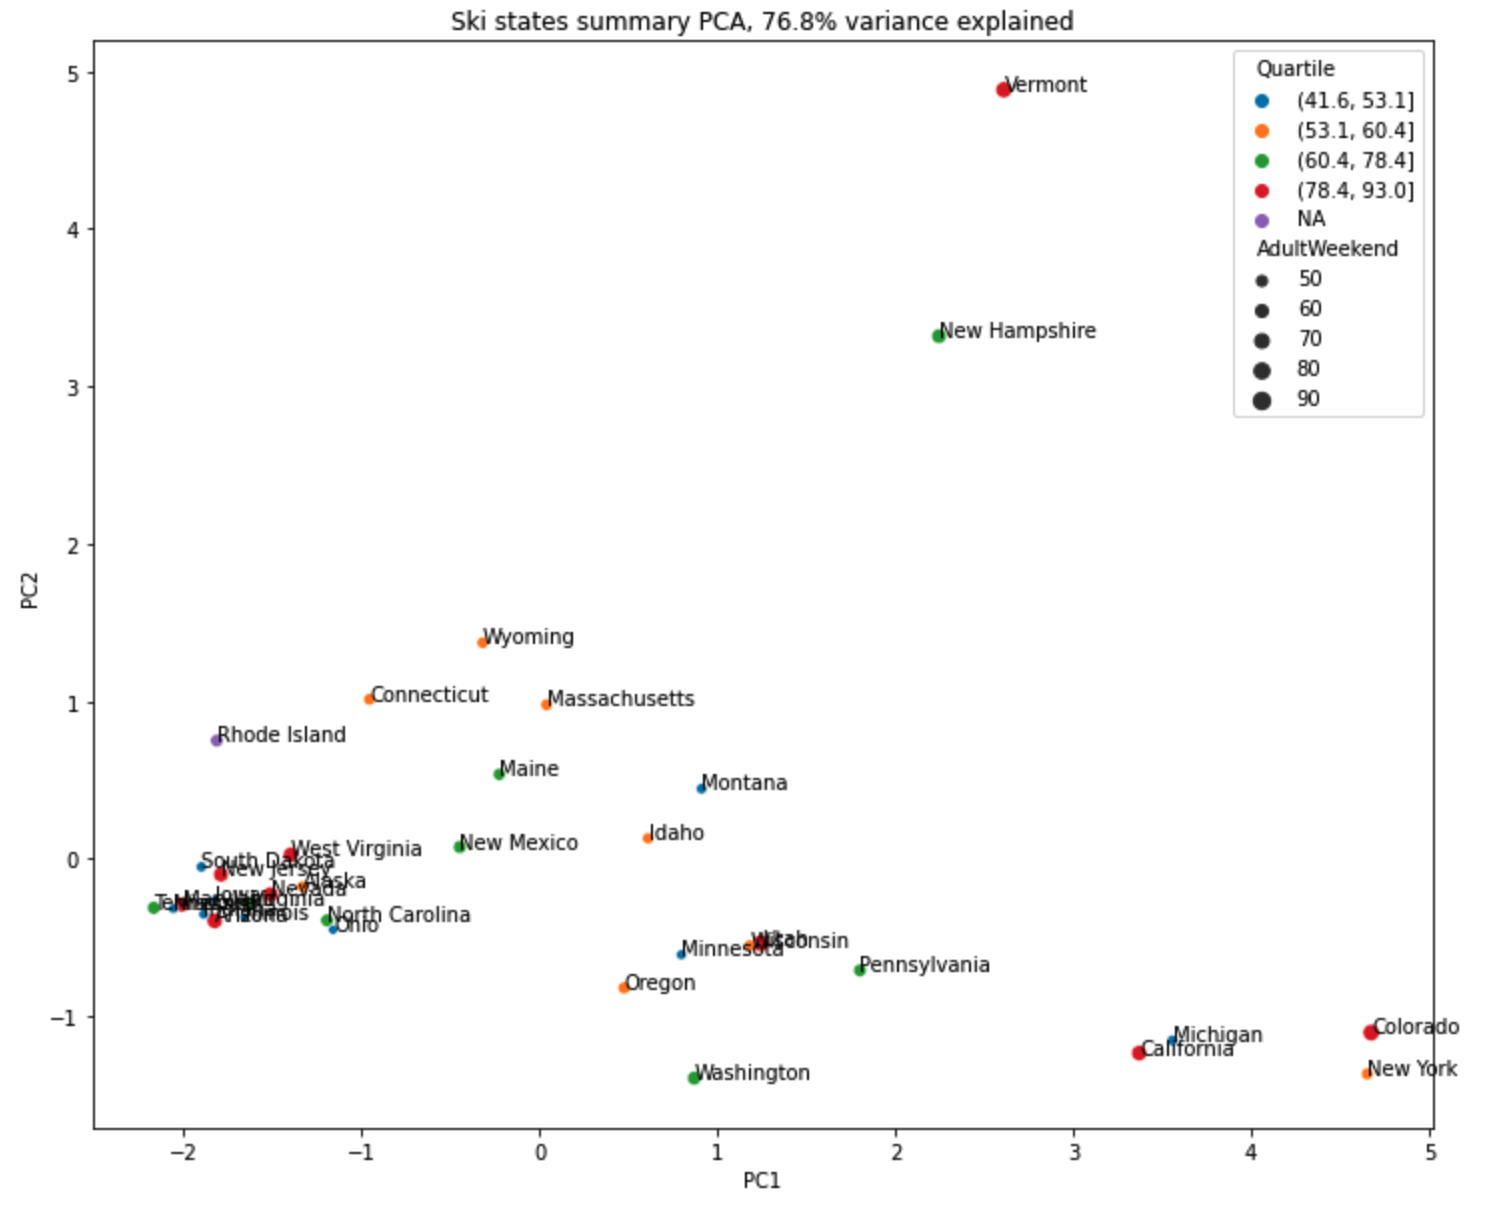



In Figure 6, a heatmap shows stronger and weaker correlations between categories. Several strong correlations are seen with AdultWeekend ticket prices, including the number of fast quad lifts, the number of runs, snow making abilities, and the overall vertical drop.

### Figure 6
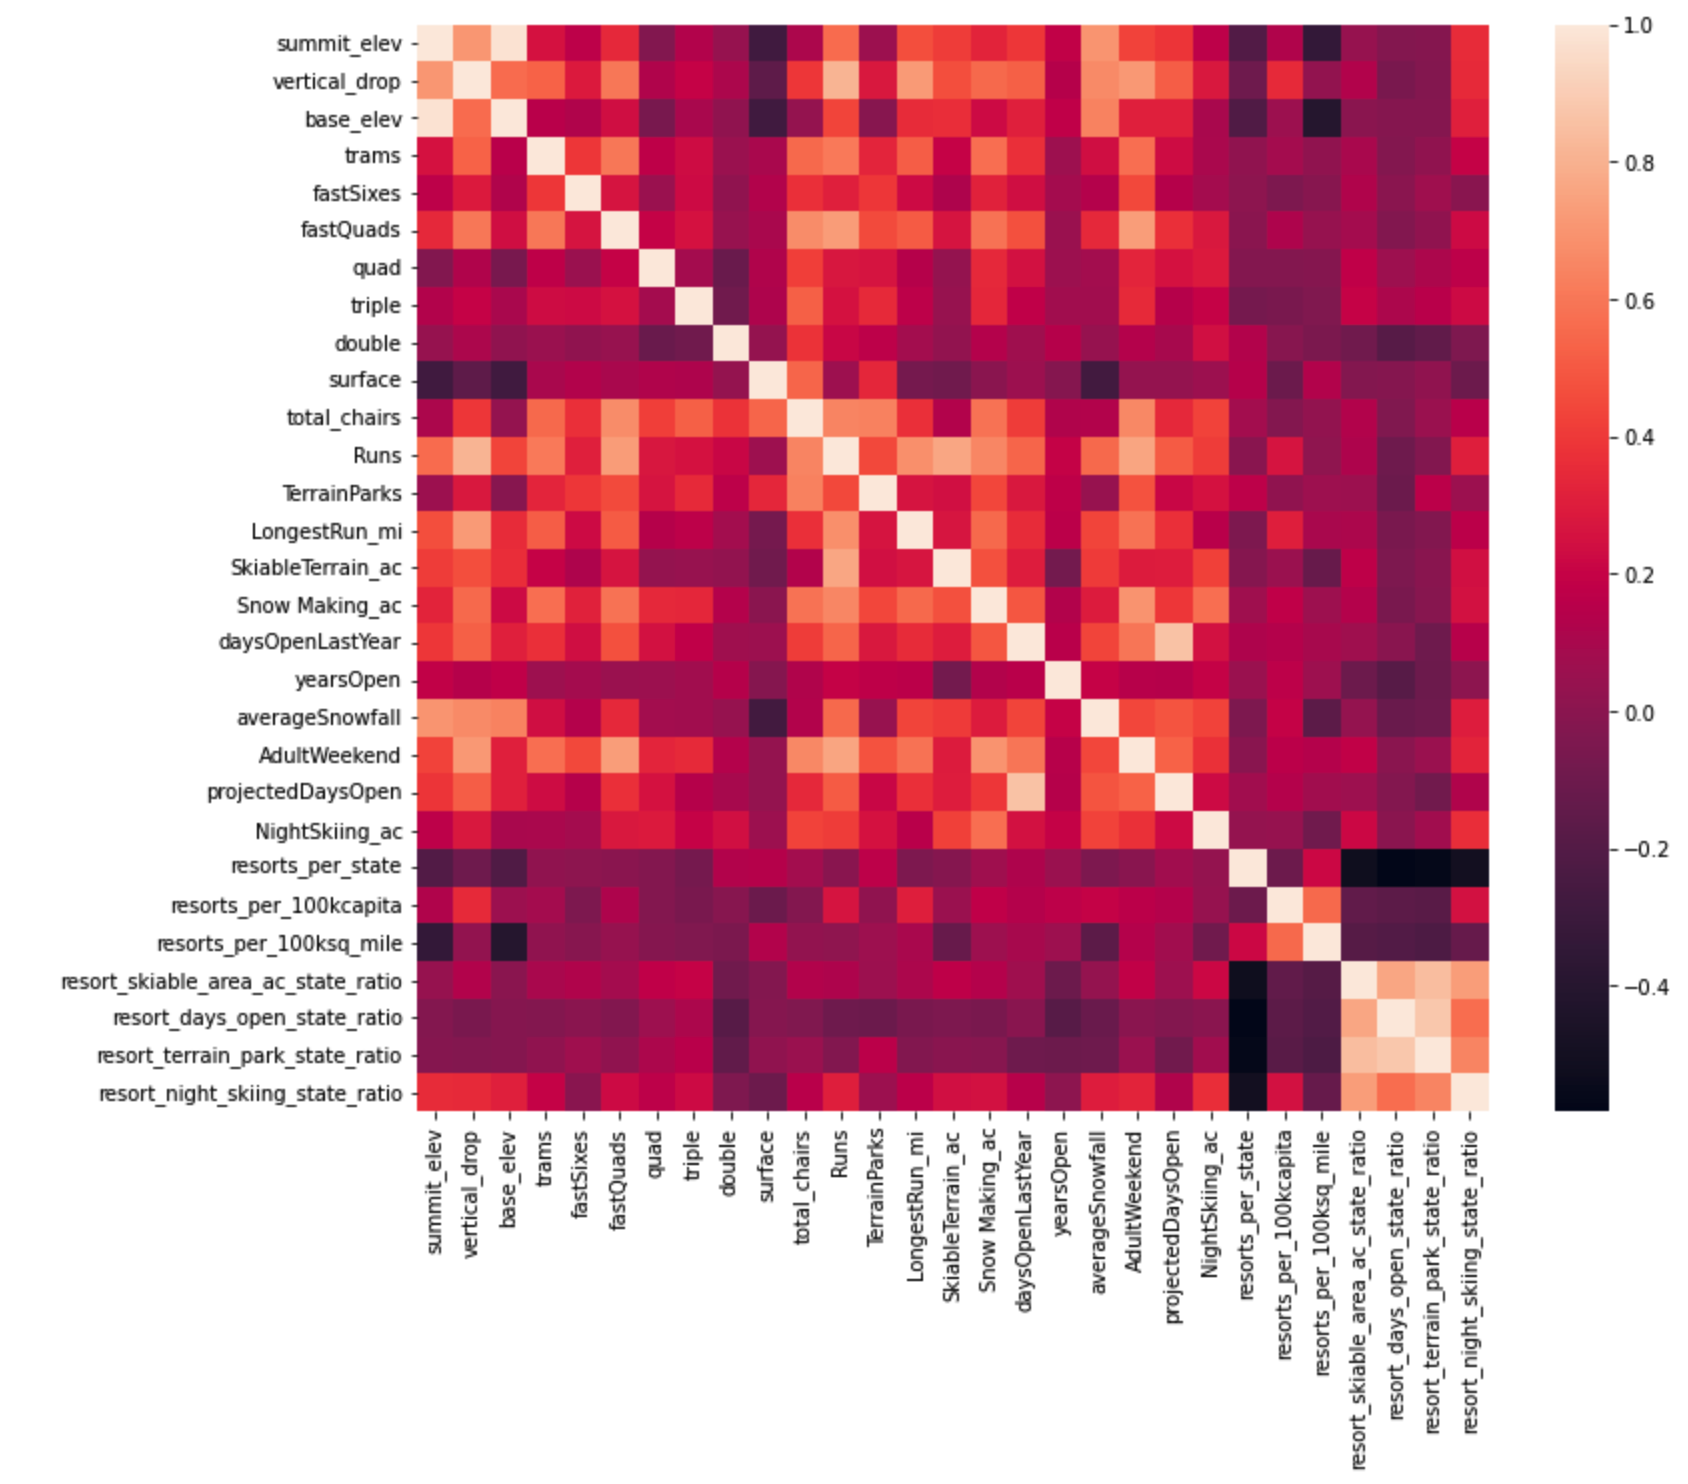

## Preprocessing & Training the Models

After loading the required packages, including sklearn, seaborn, numpy, and pandas, the dataset was split 70/30 into a training and test set, with textual columns stored separately to assist statistical analysis. As a first step in developing the best model to predict ticket prices given the amenities available, the mean of each state's AdultWeekend ticket prices was determined ($64) and tested with the coefficient of determination, the mean absolute error, and the mean squared error. With the base line for average ticket prices determined, the search for the best model to predict the optimum ticket price began.

Along with testing several approaches to imputing missing values and scaling the data appropriately, a linear regression model was first constructed with good results (80% of variance explained on the training set). The mean absolute error tells us that using this linear regression model will give us a price within a $9 range on either side of the ideal price. With the hopes of narrowing that range, more models were constructed. This linear model used all the possible predictors, and in subsequent modeling the number of predictors was restricted to improve performance.

Cross-validation of the parameter pipeline for the linear regression worked well with the test set and revealed that 8 parameters was the best set for accounting for variation. Those features that positively correlated with higher ticket prices in the model include (in order) vertical drop, fast quad lifts, total number of chairs, number of runs, fast six-person lifts, snow making ability, days open, and average snow fall.

To enhance the predictive model, a random forest regressor was also applied to the training set of data, with medians chosen as the best approach to imputing missing data. Drawing from a cross-validation of different random forest assessments, numerous factors were chosen as influential for ticket prices, including runs, number of fast quads, vertical drop, the amount of skiable terrain, days open, and snow making ability.

By comparing the mean absolute error of both the linear regression model and the random forest regression model, it was determined that the random forest regression model had the lowest error range and is thereby the best for picking future prices for the chosen parameters. This model provides the most accurate assessment for future ticket prices.



## Modeling & Optimizing the Price

The current price for a Big Mountain adult chair lift ticket for the weekends is 81 dollars. Implementing the model adopted from the preprocessing trials (random forest regression) to the prices from other resorts, the expected price for Big Mountain is 93.76. Although there is a possible error of 10.22 dollars, the predicted price still falls outside that range. In all, the Big Mountain price for this type of ticket is too low.

Changes to the ticket price should take into consideration where it stand in comparison to other resorts. Wherever relevant, graphs for Big Mountain’s place as compared to other resorts are given for both the entire market share of ski resorts and for those in Western US states. Overall, Big Mountain has good resources and can justify an increased price. Especially as compared to Western states, the $81 price for a ticket seems low and an increased price would not stand out as unusual in comparison to other Western resorts. Big Mountain also compares well in terms of amenities like lifts and skiable area. With such comparable statistics, a price increase is justified.

Several scenarios were considered. In Scenario 1, if the resort wants to close a few lifts to reduce prices, the analysis of cost/benefit reveals that 5 closed lifts is the optimum number (see 71 above <a href='#the_destination'>Link to graphs</a>. In Scenario 2, if Big Mountain would like to add a run, increasing the vertical drop by 150 feet, and install an additional chair lift, ticket prices could be raised by an additional 1.14 dollars with expected revenue increases topping out at 1,990,106 dollars. Adding snow making or increasing the longest run do not help the cost/benefit analysis.

Scenarios 1 and 2 look the most promising and it would be worth while to see how such changes to the data from other resorts would affect their ticket prices (by applying each scenario globally to the dataset).

Yet these scenarios are speculative, and an immediate price increase is justifiable by the best model given the current configuration of the Big Mountain resort.
`

In Figure 7, a histogram of the prices per state and where Big Mountain Resort's current prices falls is provided.

### Figure 7
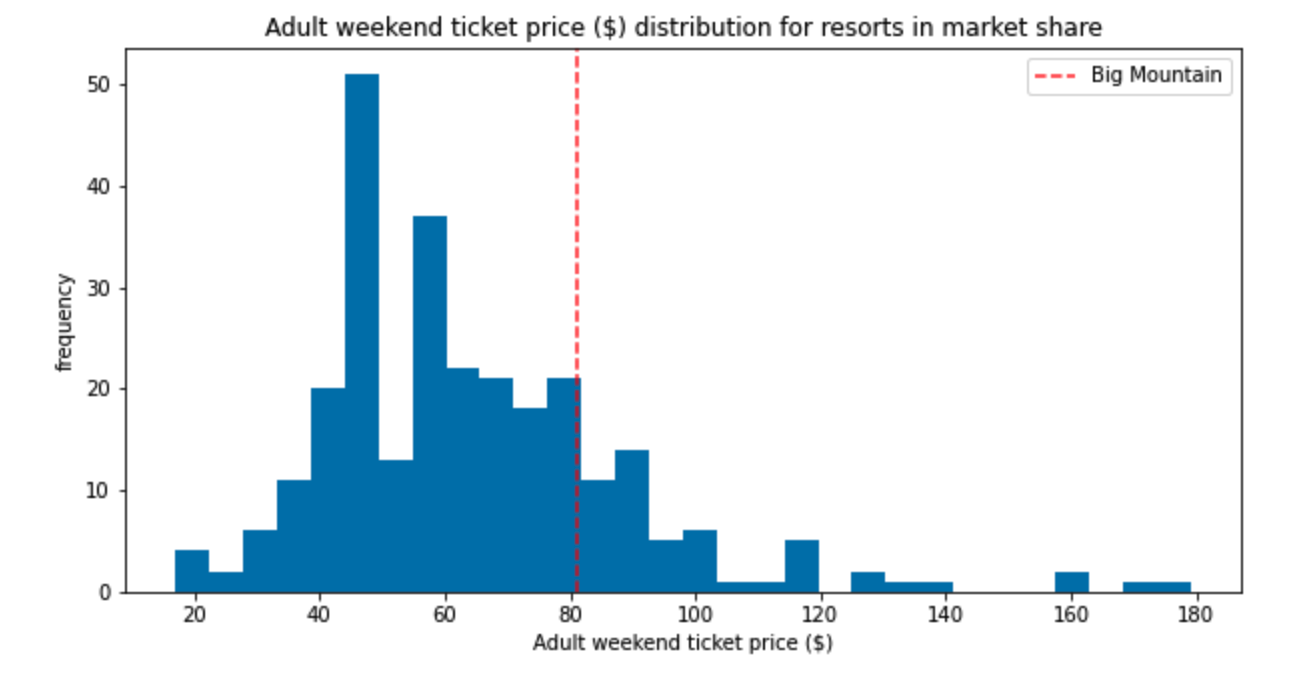

In Figure 8, the vertical drop for all resorts is provided, with Big Mountain Resort's data in red.

### Figure 8
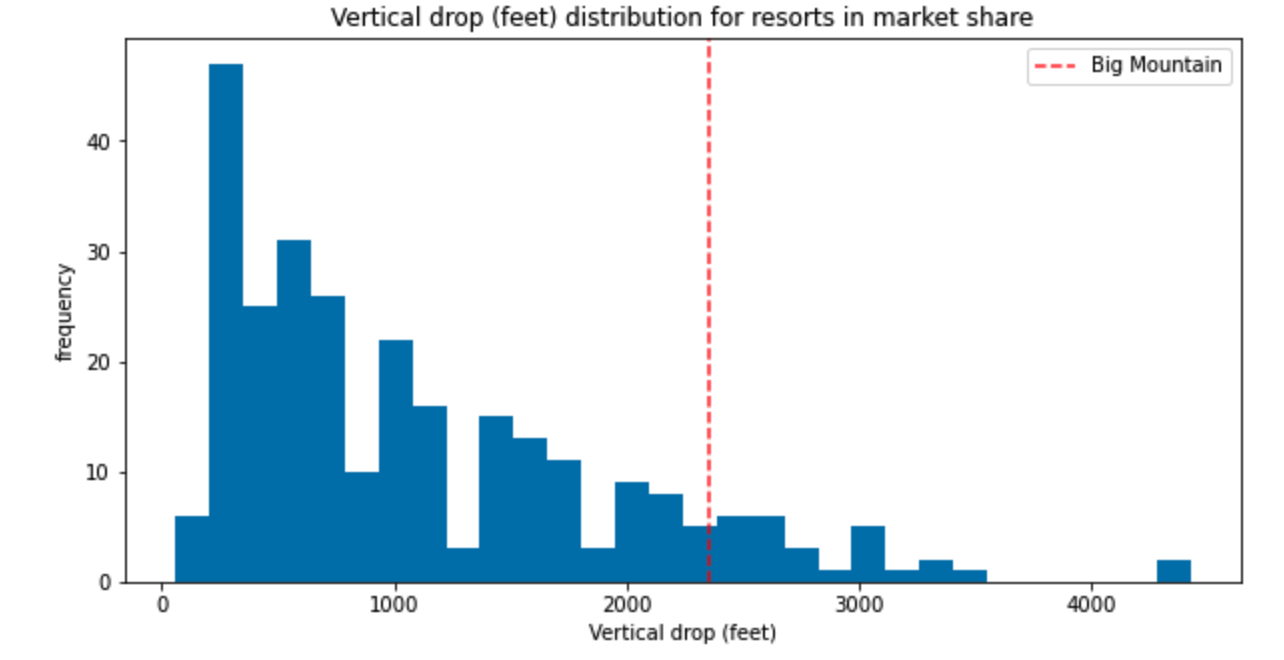

In Figure 9, the 

## Future Work

Overall, any chance to get a complete and updated set of data will allow the analysts to improve the model. Additionally, it would be best to know from the business leaders what divisions in the potential markets they would like to see. A small foray was made into Western states, and differences were clear to see. Would the business leaders just like to have a model based on Western states. Relatedly, the average stay and number of tickets bought by a customer is 5. If Big Mountain resort is a destination resort, meaning that customers travel and stay at the resort rather than come out for just a day of skiing, then it would make sense to model prices against other destination resorts. Many resorts in Eastern states operate as "local resorts" so that people can drive from their homes, ski, and return home that night. In some areas, canceled high school classes results in increased numbers of skiers. Big Mountain does not appear to be that kind of resort.

Cost scenarios could also be developed based on regular operating costs per unit of time. If those were supplied, numerous other scenarios could be generated.

Considering that Big Mountain's modeled price was so much higher than its current price, the question arises as to when it was changed last time and what the progression of price increases looks like. With more data, we can work forward in time to schedule future price increases.

Business leaders can ask data analysts to adjust certain parameters to consider potential changes to the model. The best current model answers their most pressing question but future consulting will be required to delve into updated data and different scenarios.

Business leaders can work within this jupyter notebook to make simple adjustments and check out certain ideas (such as filtering potential markets).